<a href="https://colab.research.google.com/github/azdinelaaouissi/ML/blob/main/r%C3%A9gression_Lin%C3%A9aire_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Régression Linéaire Simple Numpy


===================

---



1.Importation des bibliothèques :
import numpy as np: Importe la bibliothèque NumPy sous l'alias np, utilisée pour effectuer des opérations numériques.

from sklearn.datasets import make_regression: Importe la fonction make_regression de scikit-learn pour générer des données synthétiques pour la régression linéaire.
import matplotlib.pyplot as plt: Importe la bibliothèque Matplotlib pour la visualisation des données et des résultats.


---


2.Génération des données :

np.random.seed(0): Fixe la graine aléatoire pour assurer la reproductibilité des résultats.
x, y = make_regression(n_samples=100, n_features=1, noise=10): Génère des données synthétiques pour la régression linéaire avec 100 échantillons, 1 caractéristique, et un niveau de bruit de 10.
plt.scatter(x, y): Affiche un nuage de points des données générées.


---


3.Préparation des données :

y = y.reshape(y.shape[0], 1): Remodelle y pour avoir une dimension (100, 1).
X = np.hstack((x, np.ones(x.shape))): Crée la matrice des caractéristiques X en ajoutant une colonne de 1 pour le terme constant.


---


4.Initialisation du modèle :

np.random.seed(0): Fixe à nouveau la graine aléatoire pour assurer la reproductibilité.
theta = np.random.randn(2, 1): Initialise aléatoirement les paramètres du modèle theta sous forme d'un vecteur 2x1.


---


5.Définition des fonctions :

model(X, theta): Définit la fonction de prédiction du modèle linéaire.
cost_function(X, y, theta): Calcule la fonction de coût (erreur quadratique moyenne).
grad(X, y, theta): Calcule le gradient de la fonction de coût.
gradient_descent(X, y, theta, learning_rate, n_iterations): Implémente la descente de gradient pour entraîner le modèle.


---


6.Entraînement du modèle :

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations): Applique la descente de gradient pour ajuster les paramètres theta du modèle.


---


7.Visualisation des résultats :

predictions = model(X, theta_final): Effectue des prédictions avec les paramètres finaux theta_final.
plt.scatter(x, y), plt.plot(x, predictions, c='r'): Affiche les données réelles et la droite de régression ajustée.
coef_determination(y, model(X, theta_final)): Calcule le coefficient de détermination pour évaluer la performance du modèle.

In [79]:
import  numpy   as  np
from  sklearn.datasets  import  make_regression
import matplotlib.pyplot as plt


### 1.DataSet

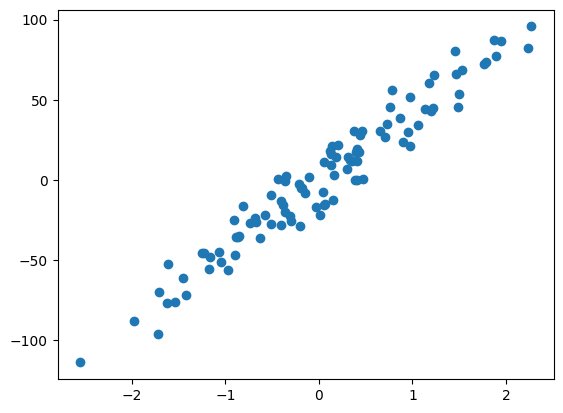

In [80]:
np.random.seed(0)
x,y=make_regression(n_samples=100,n_features=1,noise=10)
plt.scatter(x, y)

In [81]:
np.random.seed(0)
y=y.reshape(y.shape[0],1)
x.shape

(100, 1)

In [82]:
y.shape

(100, 1)

In [83]:
np.random.seed(0)
y=y.reshape(y.shape[0],1)

In [84]:
y.shape

(100, 1)

In [85]:
X=np.hstack((x,np.ones(x.shape)))

In [86]:
X.shape

(100, 2)

In [87]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

### 2. Modele Linéaire

In [88]:
def  model(X,theta):
  return  X.dot(theta)


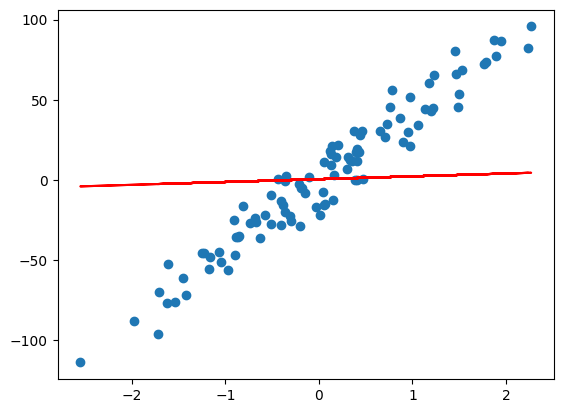

In [89]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

### 3. Fonction Cout : Erreur Quadratique moyenne

In [90]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [91]:
cost_function(X,y,theta)

905.6306841935502

### 4. Gradients et Descente de Gradient

In [92]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)


In [93]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history

### 5. Phase d'entrainement

In [94]:
n_iterations = 1000
learning_rate = 0.01
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [95]:
theta_final

array([[42.61765864],
       [-0.81309274]])

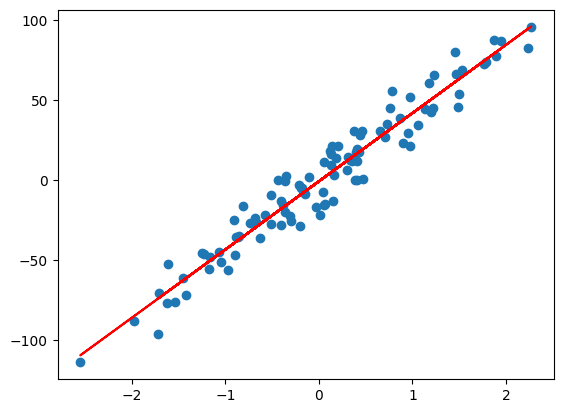

In [96]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

In [97]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v


In [99]:
coef_determination(y,model(X,theta_final))

0.9417294706504984

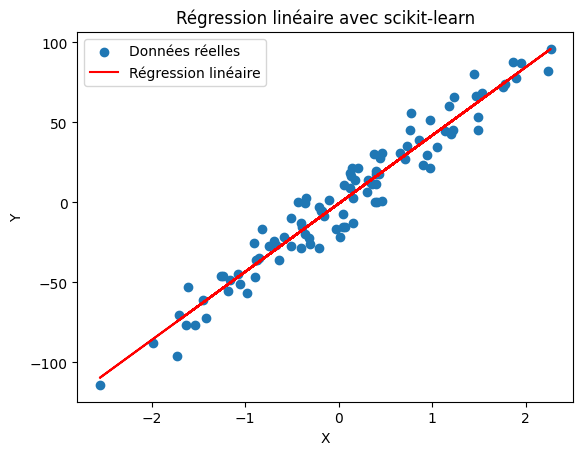

Coefficient de détermination (R²) : 0.9417294727711081


In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Génération de données synthétiques pour la régression linéaire
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)

# Initialisation et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Affichage des résultats
plt.scatter(X, y, label='Données réelles')
plt.plot(X, model.predict(X), color='red', label='Régression linéaire')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Régression linéaire avec scikit-learn')
plt.legend()
plt.show()

# Coefficient de détermination (R²)
r_squared = model.score(X, y)
print(f"Coefficient de détermination (R²) : {r_squared}")
